# Covariance and Correlation


Use PyLab to calculate – by hand, aka the hard way – the covariance between two NumPy-generated random vars and show a scatter plot of the data with MatPlotLib.

Import and setup:

In [1]:
%matplotlib inline

import json
import sys

import matplotlib
import numpy

from pylab import dot, mean

s = json.load(open('bmh_matplotlibrc.json'))
matplotlib.rcParams.update(s)

Define a function to calculate the deviation from the mean:

In [2]:
def dev_mean(v):
    'Calculate the deviation from the mean'
    mean_v = mean(v)
    return [x - mean_v for x in v]

Define a function to calculate the covariance using vector product of deviations from mean:

In [3]:
def covariance(x, y):
    'Calculate the covariance using vector product of deviations from mean'
    return dot(dev_mean(x), dev_mean(y)) / (len(x) - 1)

Define a function to calculate the correlation between two variables:

In [4]:
def correlation(x, y):
    'Calculate the correlation between x and y'
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x, y) / stddevx / stddevy  # What if ZeroDivisionError?

Start with two random variables:

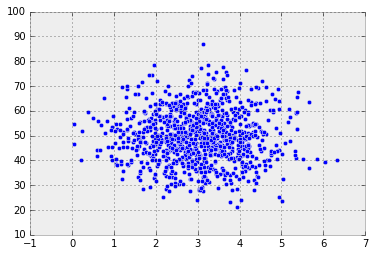

Covariance of randomness is: -0.078003
Covariance of randomness by NumPy: -0.078003
Correlation of randomness is: -0.007621
Correlation of randomness by NumPy: -0.007613


In [5]:
A = numpy.random.normal(3.0, 1.0, 1000)
B = numpy.random.normal(50.0, 10.0, 1000)
matplotlib.pyplot.scatter(A, B)
matplotlib.pyplot.show()

print('Covariance of randomness is: %f' % covariance(A, B))
print('Covariance of randomness by NumPy: %f' % numpy.cov(A, B)[1][0])
print('Correlation of randomness is: %f' % correlation(A, B))
print('Correlation of randomness by NumPy: %f' % numpy.corrcoef(A, B)[1][0])

Now work with two proportional variables:

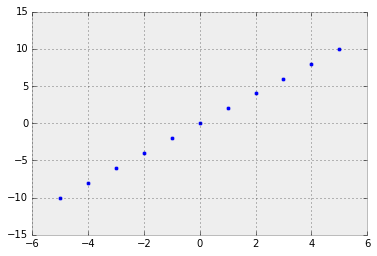

X: [-5 -4 -3 -2 -1  0  1  2  3  4  5]
Y: [-10  -8  -6  -4  -2   0   2   4   6   8  10]
X ● Y = 220.000000
dev_mean(X) ● dev_mean(Y) = 220.000000
dev_mean(X) ● dev_mean(Y) / 10 = 22.000000
covariance(X, Y) = 22.000000
correlation(X, Y) = 1.100000
numpy.corrcoef(X, Y) = 1.000000


In [6]:
X = numpy.array(range(-5, 6))
Y = 2 * X
P_dev = dot(dev_mean(X), dev_mean(Y))
matplotlib.pyplot.scatter(X, Y)
matplotlib.pyplot.show()

print('X: %s\nY: %s' % (X, Y))
print(u'X ● Y = %f' % dot(X, Y))
print(u'dev_mean(X) ● dev_mean(Y) = %f' % P_dev)
print(u'dev_mean(X) ● dev_mean(Y) / %d = %f' % (len(X) - 1, (P_dev / (len(X) - 1))))
print('covariance(X, Y) = %f' % covariance(X, Y))
print('correlation(X, Y) = %f' % correlation(X, Y))
print('numpy.corrcoef(X, Y) = %f' % numpy.corrcoef(X, Y)[1][0])